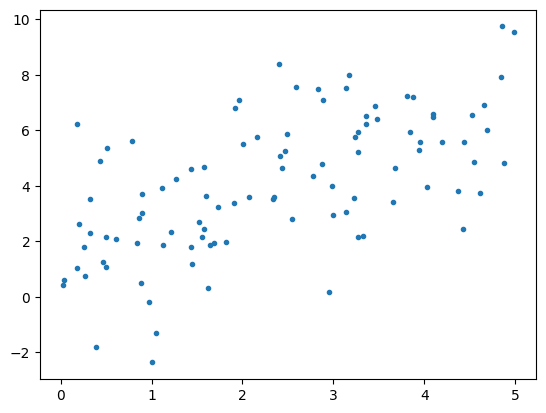

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

N = 100

coeff = 5

# generate sample data
X = coeff * np.random.rand(N)

# oracle (single linear)
y = 1.2 * X + 1 + 2 * np.random.randn(N)

plt.plot(X, y, '.')

In [2]:
X0 = np.ones(N)

X_ = np.stack([X0, X], axis = 1)

X_

array([[1.        , 4.84113411],
       [1.        , 3.13744184],
       [1.        , 3.66152959],
       [1.        , 3.32697879],
       [1.        , 3.95570106],
       [1.        , 0.26424599],
       [1.        , 2.99474475],
       [1.        , 1.51711676],
       [1.        , 4.19602184],
       [1.        , 0.02089129],
       [1.        , 3.27418686],
       [1.        , 1.57182017],
       [1.        , 1.4316173 ],
       [1.        , 1.21150749],
       [1.        , 2.58554057],
       [1.        , 0.25289338],
       [1.        , 4.4374755 ],
       [1.        , 0.88473198],
       [1.        , 0.86123099],
       [1.        , 2.83030926],
       [1.        , 0.49970936],
       [1.        , 4.52633228],
       [1.        , 0.83412487],
       [1.        , 1.81736931],
       [1.        , 0.49632969],
       [1.        , 4.42750944],
       [1.        , 1.72649404],
       [1.        , 2.48574146],
       [1.        , 0.89670212],
       [1.        , 2.78008923],
       [1.

In [3]:
np.dot(X_.T, X_)

array([[100.        , 234.76230315],
       [234.76230315, 755.54710058]])

In [4]:
np.linalg.inv(np.dot(X_.T, X_))

array([[ 0.03696166, -0.01148467],
       [-0.01148467,  0.00489204]])

In [5]:
import numpy as np
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression


w = np.dot(np.linalg.inv(np.dot(X_.T, X_)), np.dot(X_.T, y))

print('Method 1: matrix formulation')
print(np.dot(np.linalg.inv(np.dot(X_.T, X_)), np.dot(X_.T, y)))


Method 1: matrix formulation
[1.60088357 1.04732882]


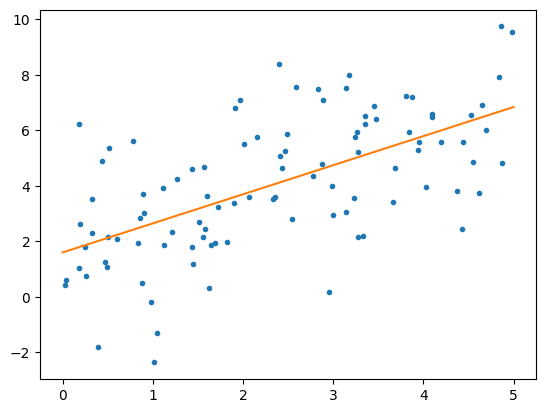

In [6]:
import matplotlib.pyplot as plt

plt.plot(X, y, '.')
plt.plot([0, coeff], [w[0], coeff * w[1] + w[0]])

In [7]:
N = 20

In [8]:
X = np.random.normal(loc=2.5, scale=2.0, size=N)


In [9]:
X.shape

(20,)

In [10]:
X[:, np.newaxis].shape

(20, 1)

In [11]:
norm_noise = np.random.normal(loc=0, scale=0.1, size=N)



In [12]:
norm_noise

array([ 0.06248518,  0.0175969 , -0.07779362,  0.01399504,  0.15991759,
       -0.11033599, -0.18008119, -0.01309053, -0.01037854,  0.08397408,
       -0.10141861,  0.07693816, -0.05103124, -0.09803828, -0.08075385,
        0.01162388,  0.05032107,  0.07510915, -0.04210556,  0.01856288])

In [13]:
norm_noise.reshape(-1, 1)

array([[ 0.06248518],
       [ 0.0175969 ],
       [-0.07779362],
       [ 0.01399504],
       [ 0.15991759],
       [-0.11033599],
       [-0.18008119],
       [-0.01309053],
       [-0.01037854],
       [ 0.08397408],
       [-0.10141861],
       [ 0.07693816],
       [-0.05103124],
       [-0.09803828],
       [-0.08075385],
       [ 0.01162388],
       [ 0.05032107],
       [ 0.07510915],
       [-0.04210556],
       [ 0.01856288]])

Method 1: matrix formulation
[[ 0.40581004]
 [-0.15255462]]


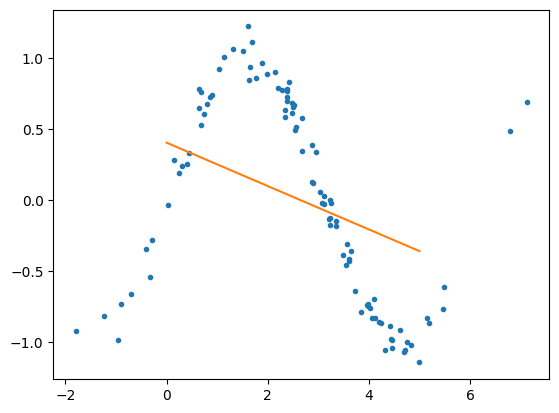

In [14]:
import numpy as np
import matplotlib.pyplot as plt

#np.random.seed(101)

#x[:, None]               # shape: (3, 1) <- 2d (single column matrix)
#x[:, np.newaxis]         # shape: (3, 1) <- a meaningful alias to None
#x.reshape(-1, 1)         # shape: (3, 1)

N = 100


# generate sample data (single linear)
#X = 5 * np.random.rand(N, 1)

X = np.random.normal(loc=2.5, scale=2.0, size=N)
X = X[:, np.newaxis]
#y = 2.2 * X + 1 + 0.8 * np.random.randn(N, 1)
#y = 2 * X**2 + -15.2 * X + 1 + 0.8 * np.random.randn(N, 1)

norm_noise = np.random.normal(loc=0, scale=0.1, size=N)
norm_noise = norm_noise.reshape(-1, 1)

y = np.sin(X) + norm_noise

n, m = X.shape # for generality

X0 = np.ones((n, 1))
Xnew = np.hstack((X0, X))

#X_ = sm.add_constant(X)  # add constant for intercept computation

w = np.dot(np.linalg.inv(np.dot(Xnew.T, Xnew)), np.dot(Xnew.T, y))

print('Method 1: matrix formulation')
print(w)

plt.plot(X, y, '.')
plt.plot([0, 5], [w[0], 5 * w[1] + w[0]])



In [15]:
E_in = (X * w[1] + w[0] - y)**2

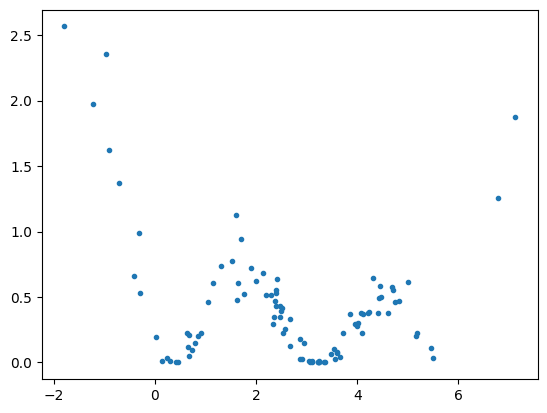

In [16]:
plt.plot(X, E_in, '.')